CAR PRICE PREDICTION PROJECT (DEVOPS)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("cardekho.csv")
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [2]:
df.shape

(8128, 12)

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [4]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [5]:
df["brand"] = df["name"].str.split().str[0]
df["brand"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [6]:
df.rename(columns={'mileage(km/ltr/kg)': 'mileage'}, inplace=True)
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')


In [7]:
for col in ["mileage", "engine", "max_power", "seats"]:
    df[col] = df[col].fillna(df[col].median())

for col in ["fuel", "seller_type", "transmission", "owner", "brand"]:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]
df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)


In [9]:
X = df.drop(['selling_price', 'name'], axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

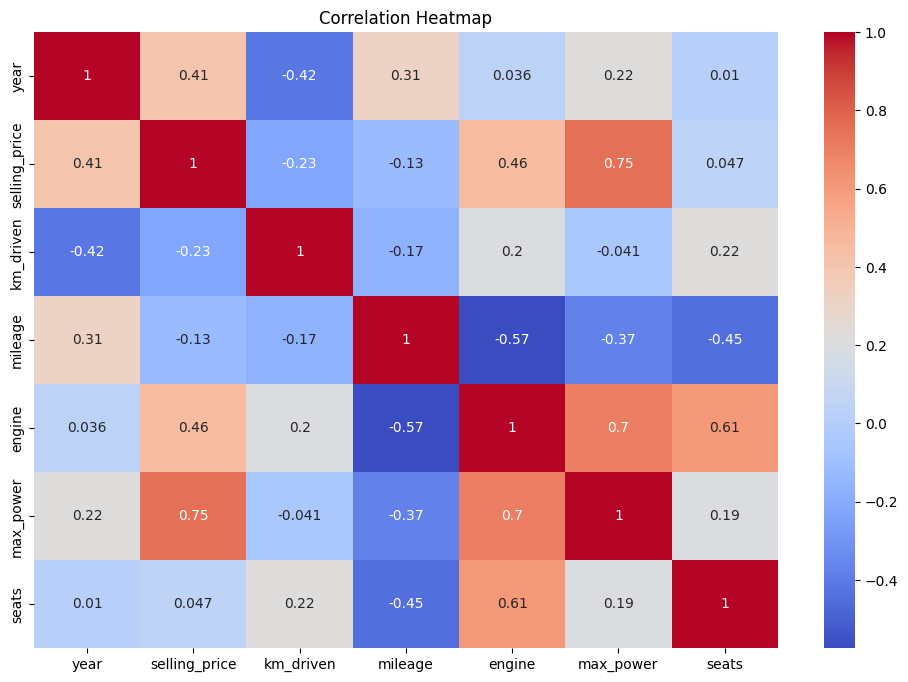

In [10]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)
print("Approximate Accuracy (%):", r2*100)

R2 Score: 0.8486765390569242
Approximate Accuracy (%): 84.86765390569242


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest R2 Score:", r2_rf)
print("Approximate Accuracy (%):", r2_rf*100)

Random Forest R2 Score: 0.9682994354690568
Approximate Accuracy (%): 96.82994354690568


In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn_model = KNeighborsRegressor(n_neighbors=5)  # you can tune n_neighbors later
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regressor R2 Score:", r2_knn)
print("Approximate Accuracy (%):", r2_knn*100)


KNN Regressor R2 Score: 0.8035462433858428
Approximate Accuracy (%): 80.35462433858427


In [14]:
model_accuracy = {
    "Linear Regression": r2,
    "Random Forest": r2_rf,
    "KNN Regressor": r2_knn
}

model_accuracy

{'Linear Regression': 0.8486765390569242,
 'Random Forest': 0.9682994354690568,
 'KNN Regressor': 0.8035462433858428}

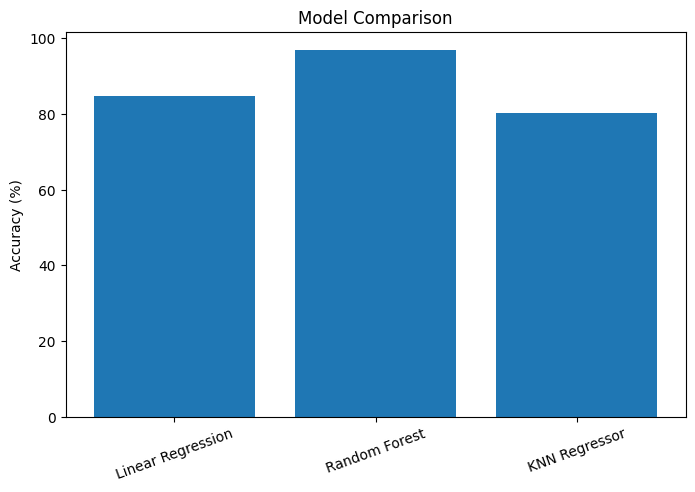

In [15]:
import matplotlib.pyplot as plt

models = list(model_accuracy.keys())
scores = [score*100 for score in model_accuracy.values()]

plt.figure(figsize=(8,5))
plt.bar(models, scores)
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison")
plt.xticks(rotation=20)
plt.show()

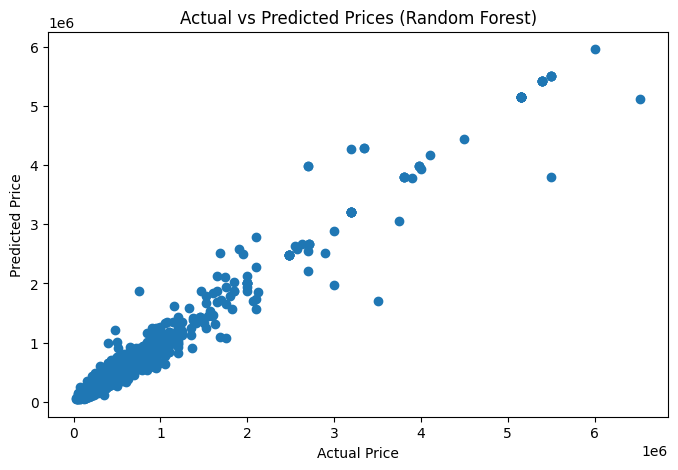

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()


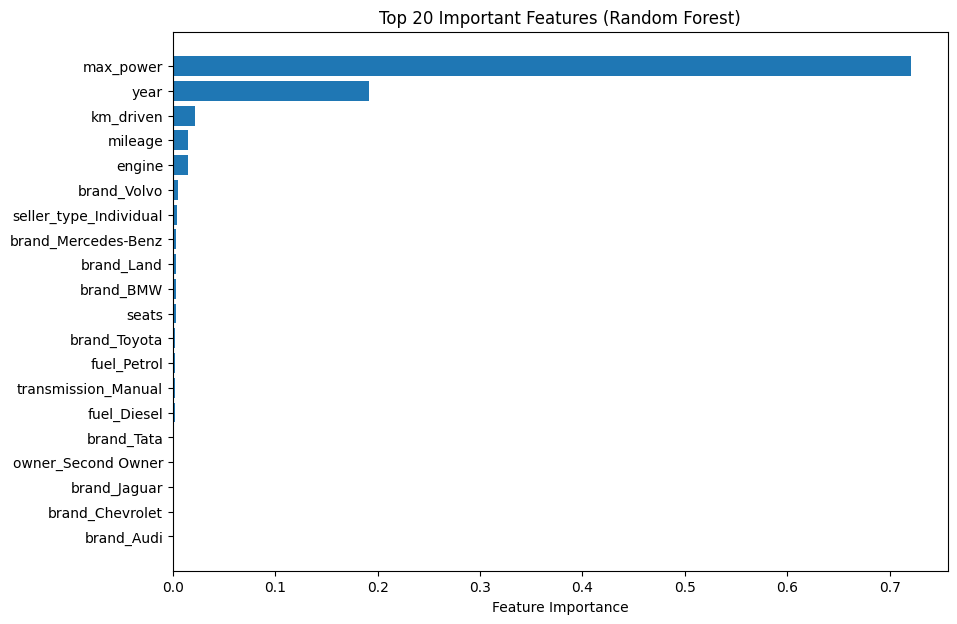

In [17]:

importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features

plt.figure(figsize=(10,7))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features (Random Forest)")
plt.show()


In [18]:
import joblib
joblib.dump(rf_model, "car_price_model.pkl")

['car_price_model.pkl']